In [78]:
import configparser 

config = configparser.ConfigParser() 
config.read("config.ini")

['config.ini']

In [80]:
# from roboflow import Roboflow
# rf = Roboflow(api_key=config["API_KEY"]["roboflow_api_key"])
# project = rf.workspace("currentcourseprojectgardenrobotvision").project("robogardenvision_extended")
# dataset = project.version(5).download("yolov8", location="dataset/RoboGardenVision_ext5/")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to dataset/RoboGardenVision_ext5/ in yolov8:: 100%|██████████| 3704/3704 [00:00<00:00, 4135.02it/s]


In [1]:
# dataset.location = f'"{dataset.location}"'
# dataset_location = dataset.location

dataset_location = f'"C:\\Users\\Fomichev Nikita\\Desktop\\Study\\tadimo\\coursework\\dataset\\COCO2020_15.yolov8"'

In [ ]:
%env CLEARML_WEB_HOST=https://app.clear.ml
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml
%env CLEARML_API_ACCESS_KEY={config["API_KEY"]["clearml_api_access_key"]}
%env CLEARML_API_SECRET_KEY={config["API_KEY"]["clearml_api_secret_key"]}

In [2]:
from clearml import Task

task = Task.init(project_name="courseWork", task_name="final_train_yolov8_batch_16_epochs_100")

ClearML Task: created new task id=5ba361d269044ce2ba60fdf2e04d6df0
2023-05-09 04:35:44,301 - clearml.Task - INFO - Storing jupyter notebook directly as code
ClearML results page: https://app.clear.ml/projects/a78625dd95994b7fab12223aa34920c7/experiments/5ba361d269044ce2ba60fdf2e04d6df0/output/log


In [2]:
!nvidia-smi

Fri May 12 07:06:12 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.61                 Driver Version: 531.61       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060       WDDM | 00000000:01:00.0  On |                  N/A |
| 44%   37C    P5               13W / 190W|    759MiB / 12288MiB |      6%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import os

HOME = os.getcwd()
print(HOME)

c:\Users\Fomichev Nikita\Desktop\Study\tadimo\coursework


In [4]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.98  Python-3.10.10 torch-2.0.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
Setup complete  (12 CPUs, 31.9 GB RAM, 704.8/930.2 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

In [6]:
%cd {HOME}

c:\Users\Fomichev Nikita\Desktop\Study\tadimo\coursework


In [9]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8n.pt data={dataset_location}/data.yaml epochs=100 imgsz=640 plots=True v5loader=True

c:\Users\Fomichev Nikita\Desktop\Study\tadimo\coursework
[2023-05-09 04:35:57,403][tensorflow][WARNING] - Please fix your imports. Module tensorflow.python.training.tracking.util has been moved to tensorflow.python.checkpoint.checkpoint. The old module will be deleted in version 2.11.


2023-05-09 04:35:58,785 - clearml.Task - WARNING - Parameters must be of builtin type (General/hydra[DictConfig])
2023-05-09 04:59:35,143 - clearml - INFO - NaN value encountered. Reporting it as '0.0'. Use clearml.Logger.set_reporting_nan_value to assign another value
2023-05-09 04:59:35,143 - clearml - INFO - inf value encountered. Reporting it as '0.0'. Use clearml.Logger.set_reporting_inf_value to assign another value
2023-05-10 10:16:58,587 - clearml.storage - INFO - Starting upload: runs\detect\train\weights\best.pt => https://files.clear.ml/courseWork/final_train_yolov8_batch_16_epochs_100.5ba361d269044ce2ba60fdf2e04d6df0/models/best.pt



  0%|          | 0.00/6.23M [00:00<?, ?B/s]
  4%|▍         | 248k/6.23M [00:00<00:02, 2.25MB/s]
 19%|█▊        | 1.16M/6.23M [00:00<00:00, 6.36MB/s]
 29%|██▉       | 1.80M/6.23M [00:00<00:00, 5.50MB/s]
 54%|█████▍    | 3.37M/6.23M [00:00<00:00, 9.27MB/s]
 71%|███████▏  | 4.45M/6.23M [00:00<00:00, 9.83MB/s]
 90%|████████▉ | 5.59M/6.23M [00:00<00:00, 10.5MB/s]
100%|██████████| 6.23M/6.23M [00:00<00:00, 9.11MB/s]

yolo\engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:\Users\Fomichev Nikita\Desktop\Study\tadimo\coursework\dataset\COCO2020_15.yolov8-yolov5/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou

In [ ]:
# !ls {HOME}/runs/detect/train/

c:\Users\Fomichev Nikita\Desktop\Study\tadimo\coursework


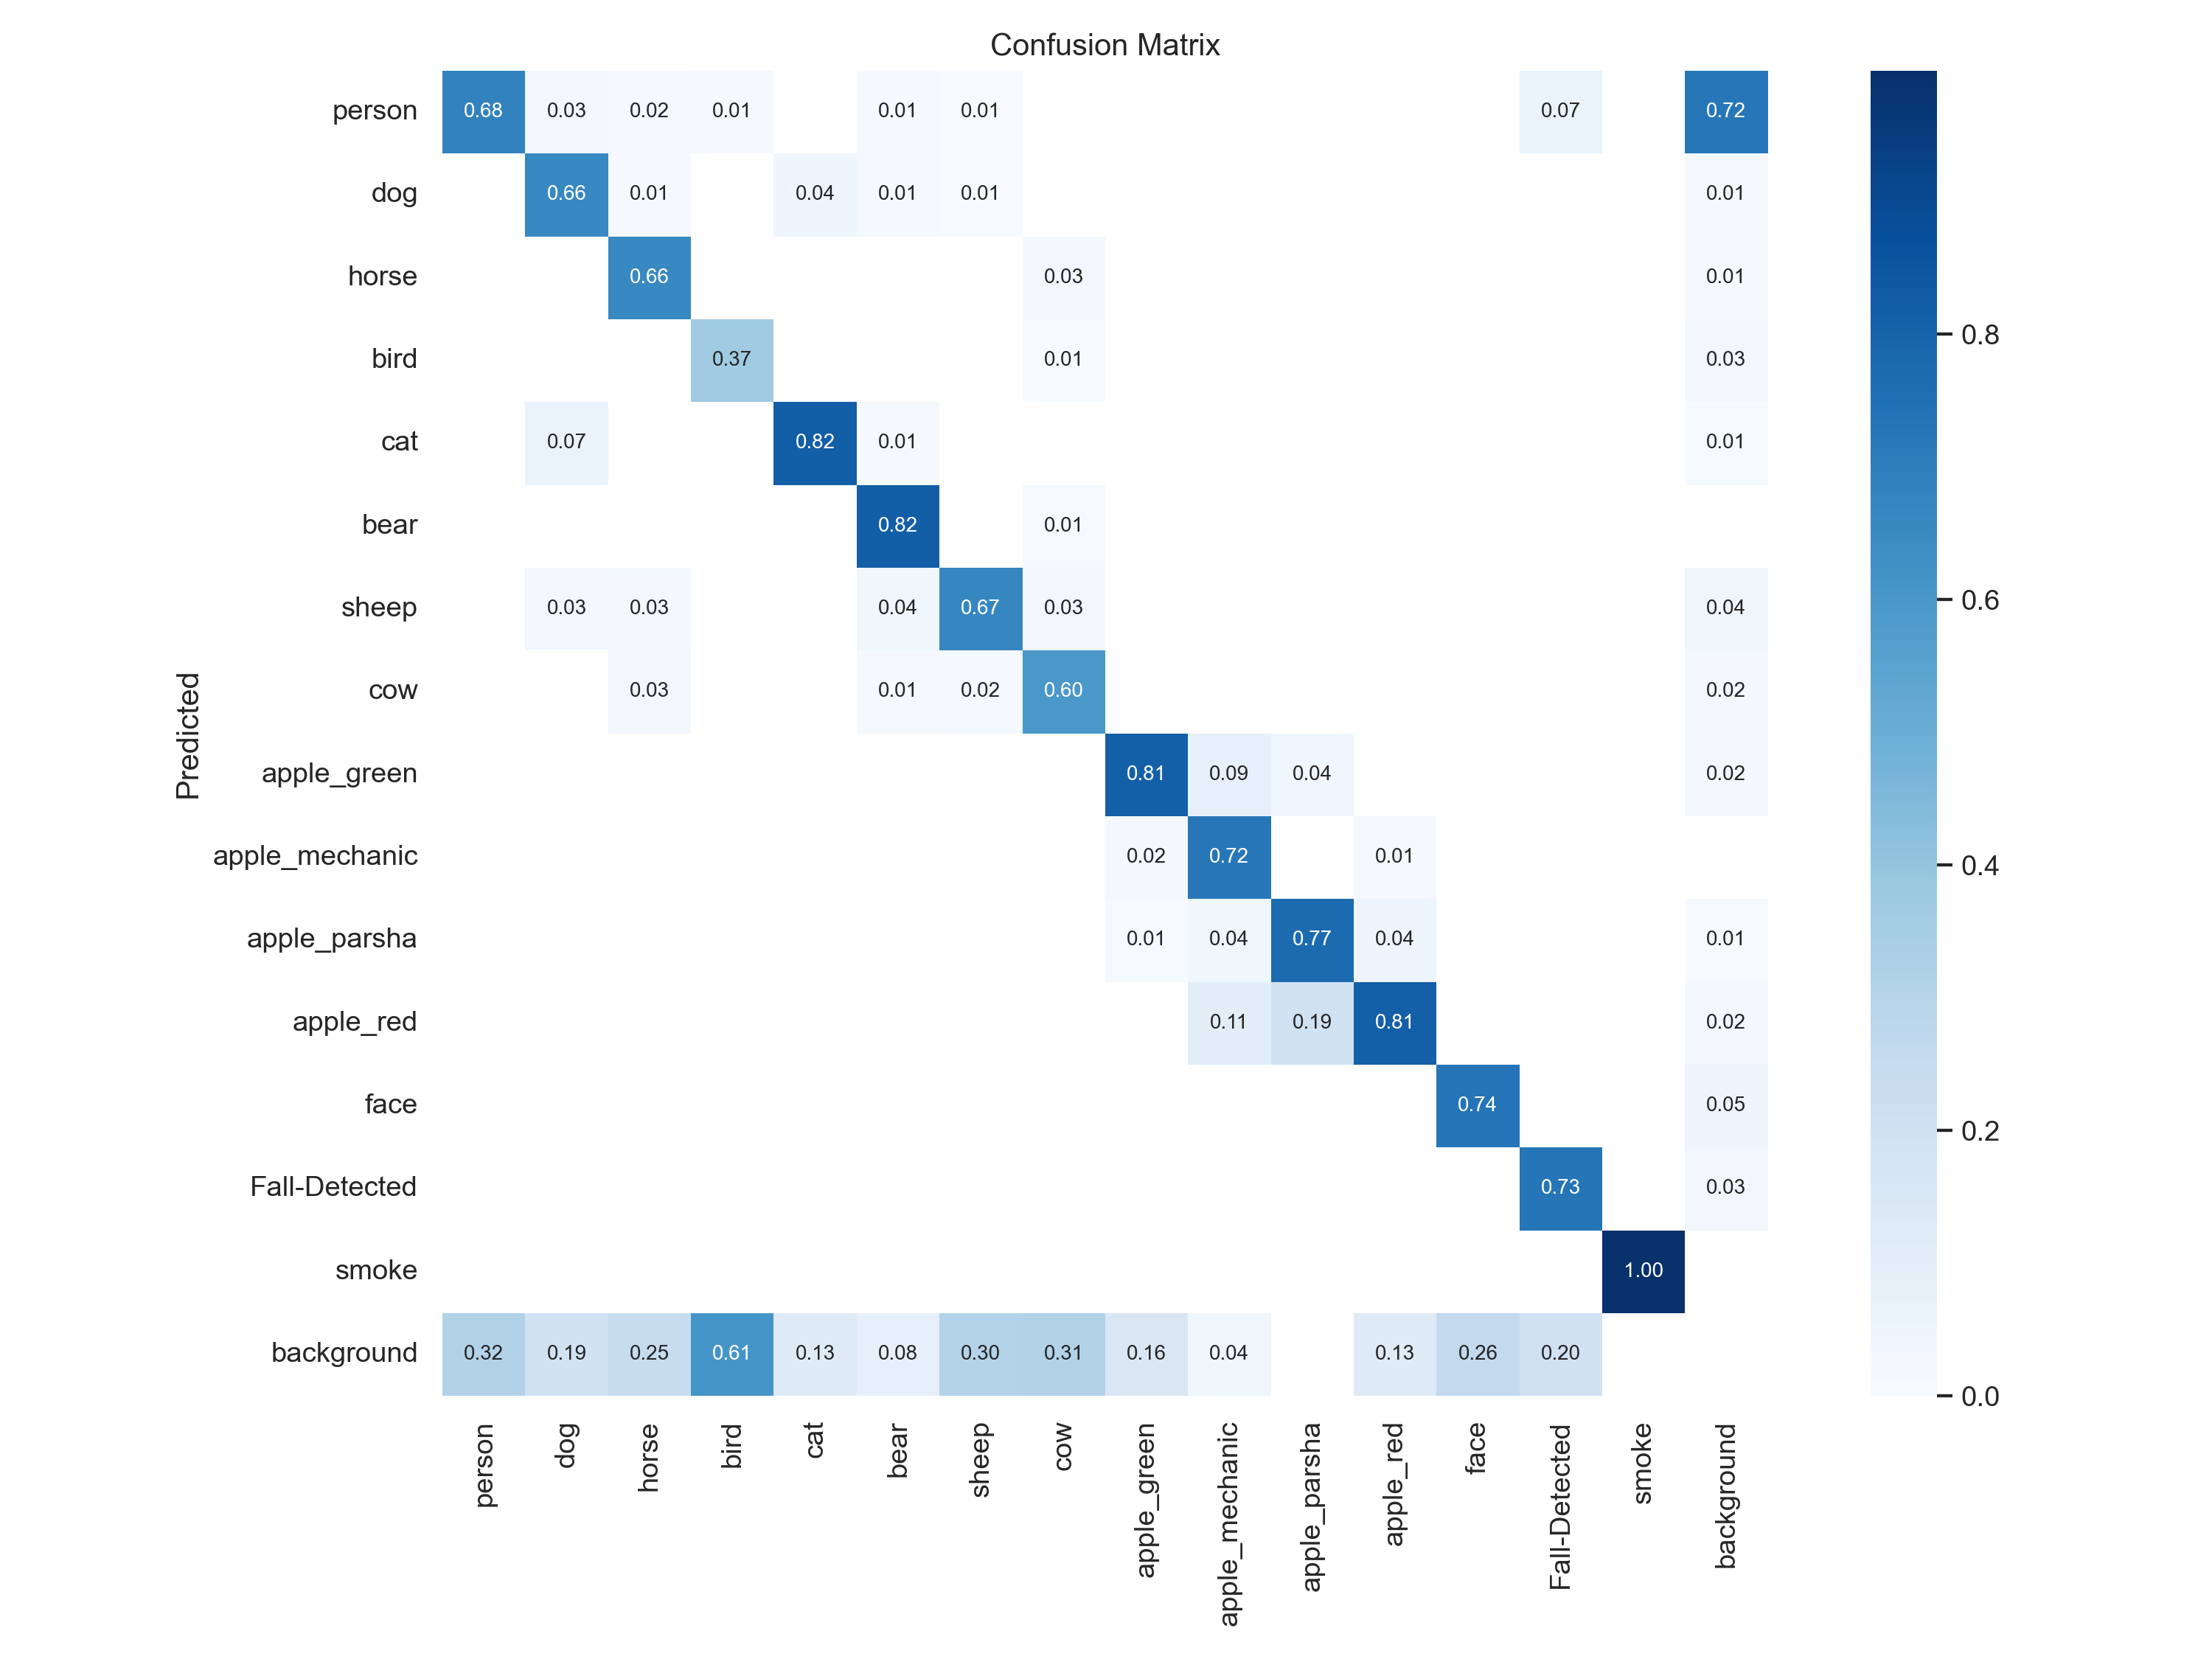

In [7]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

c:\Users\Fomichev Nikita\Desktop\Study\tadimo\coursework


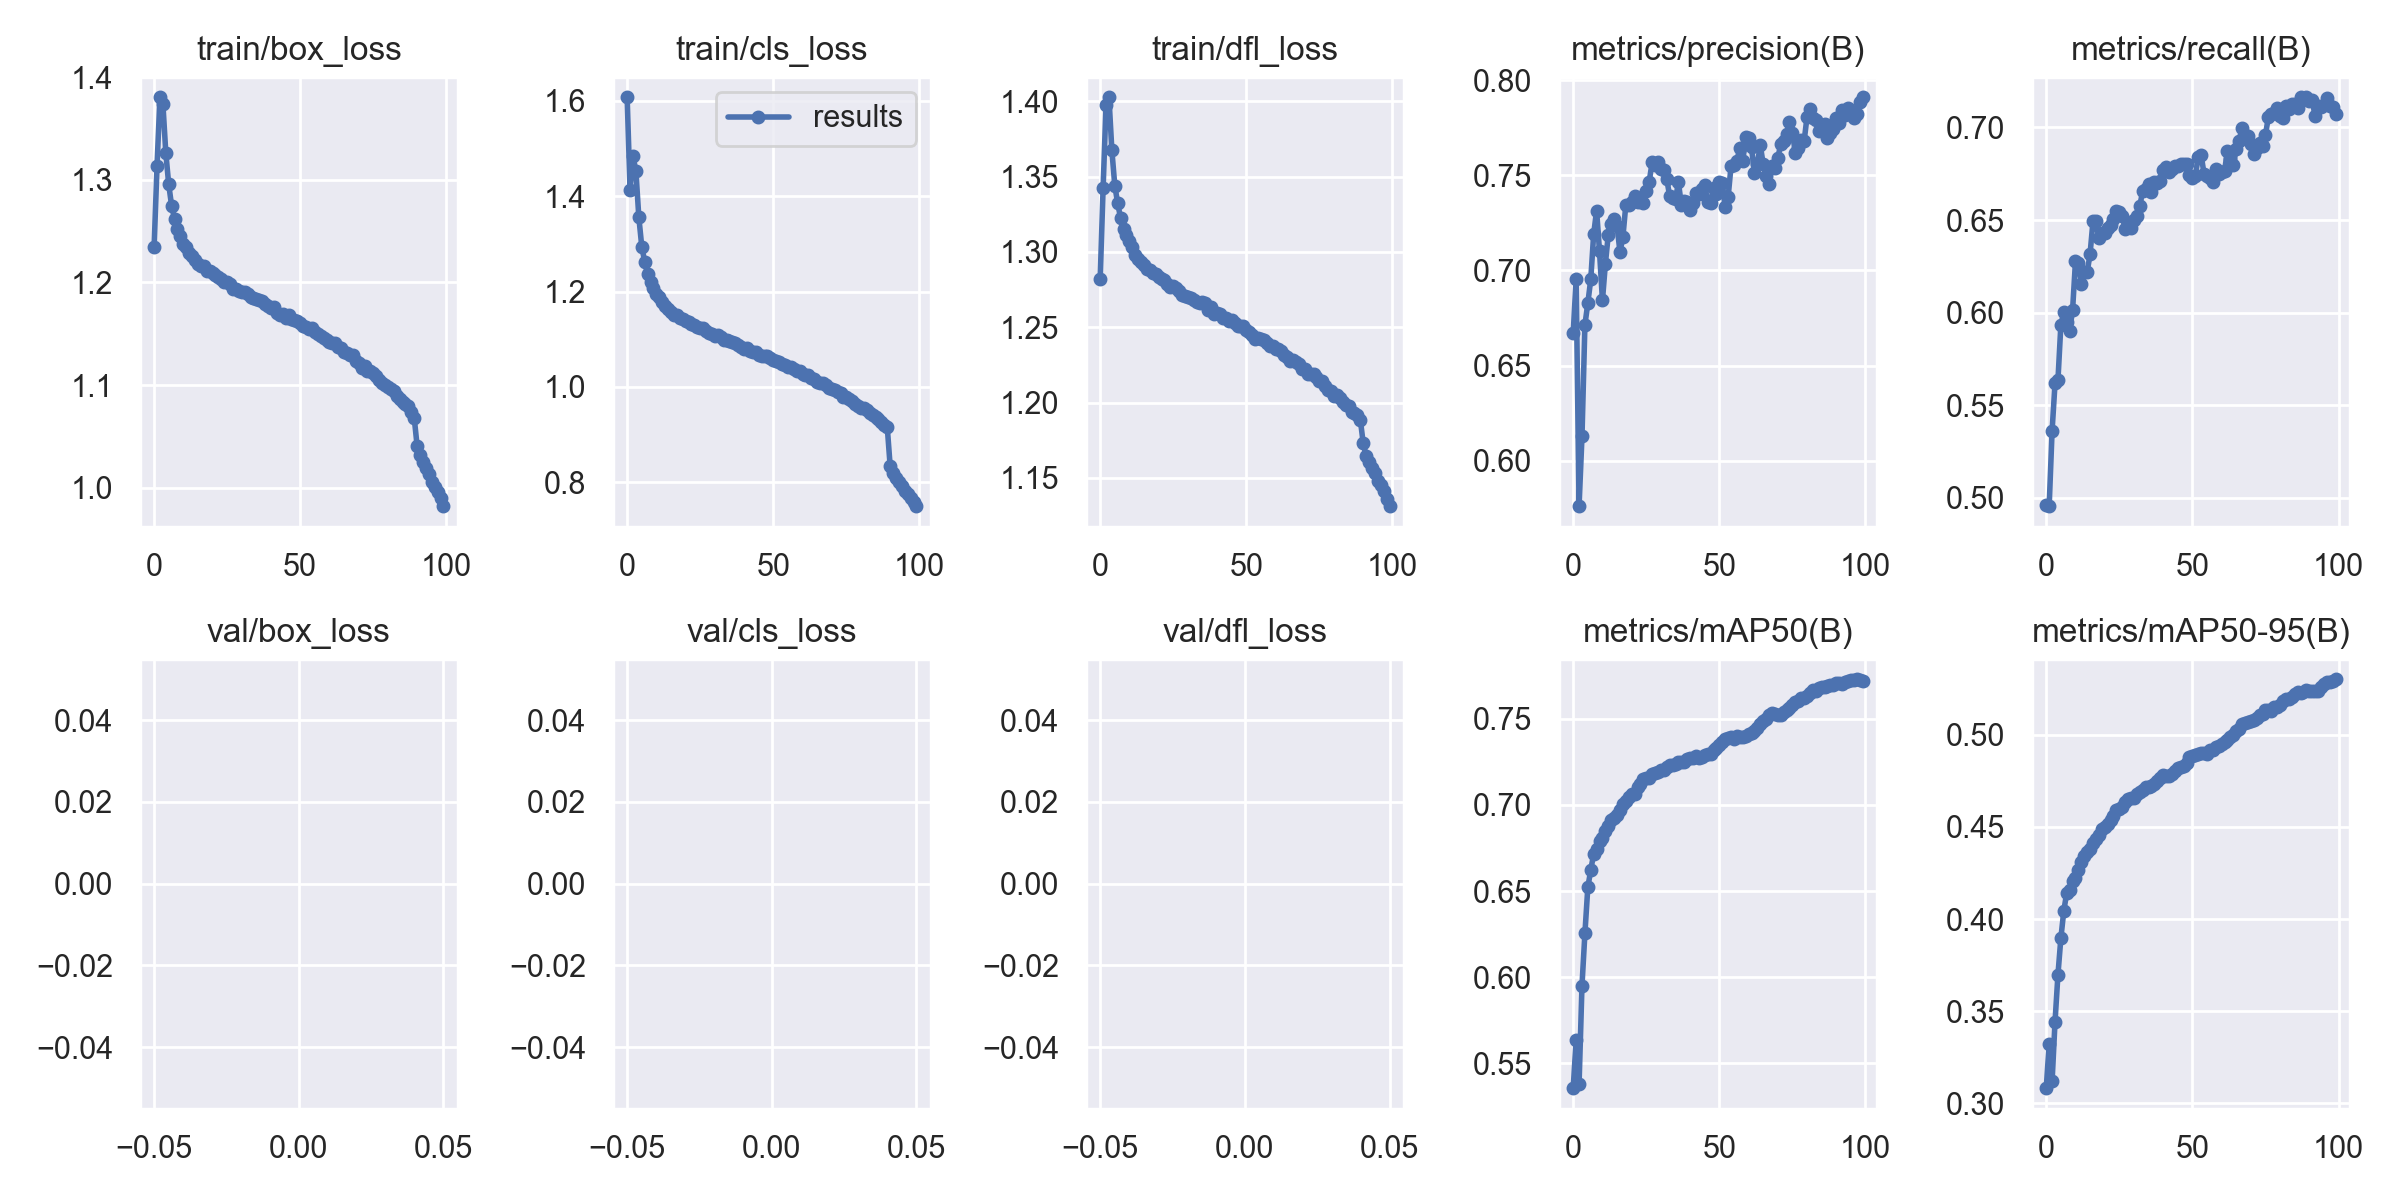

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

c:\Users\Fomichev Nikita\Desktop\Study\tadimo\coursework


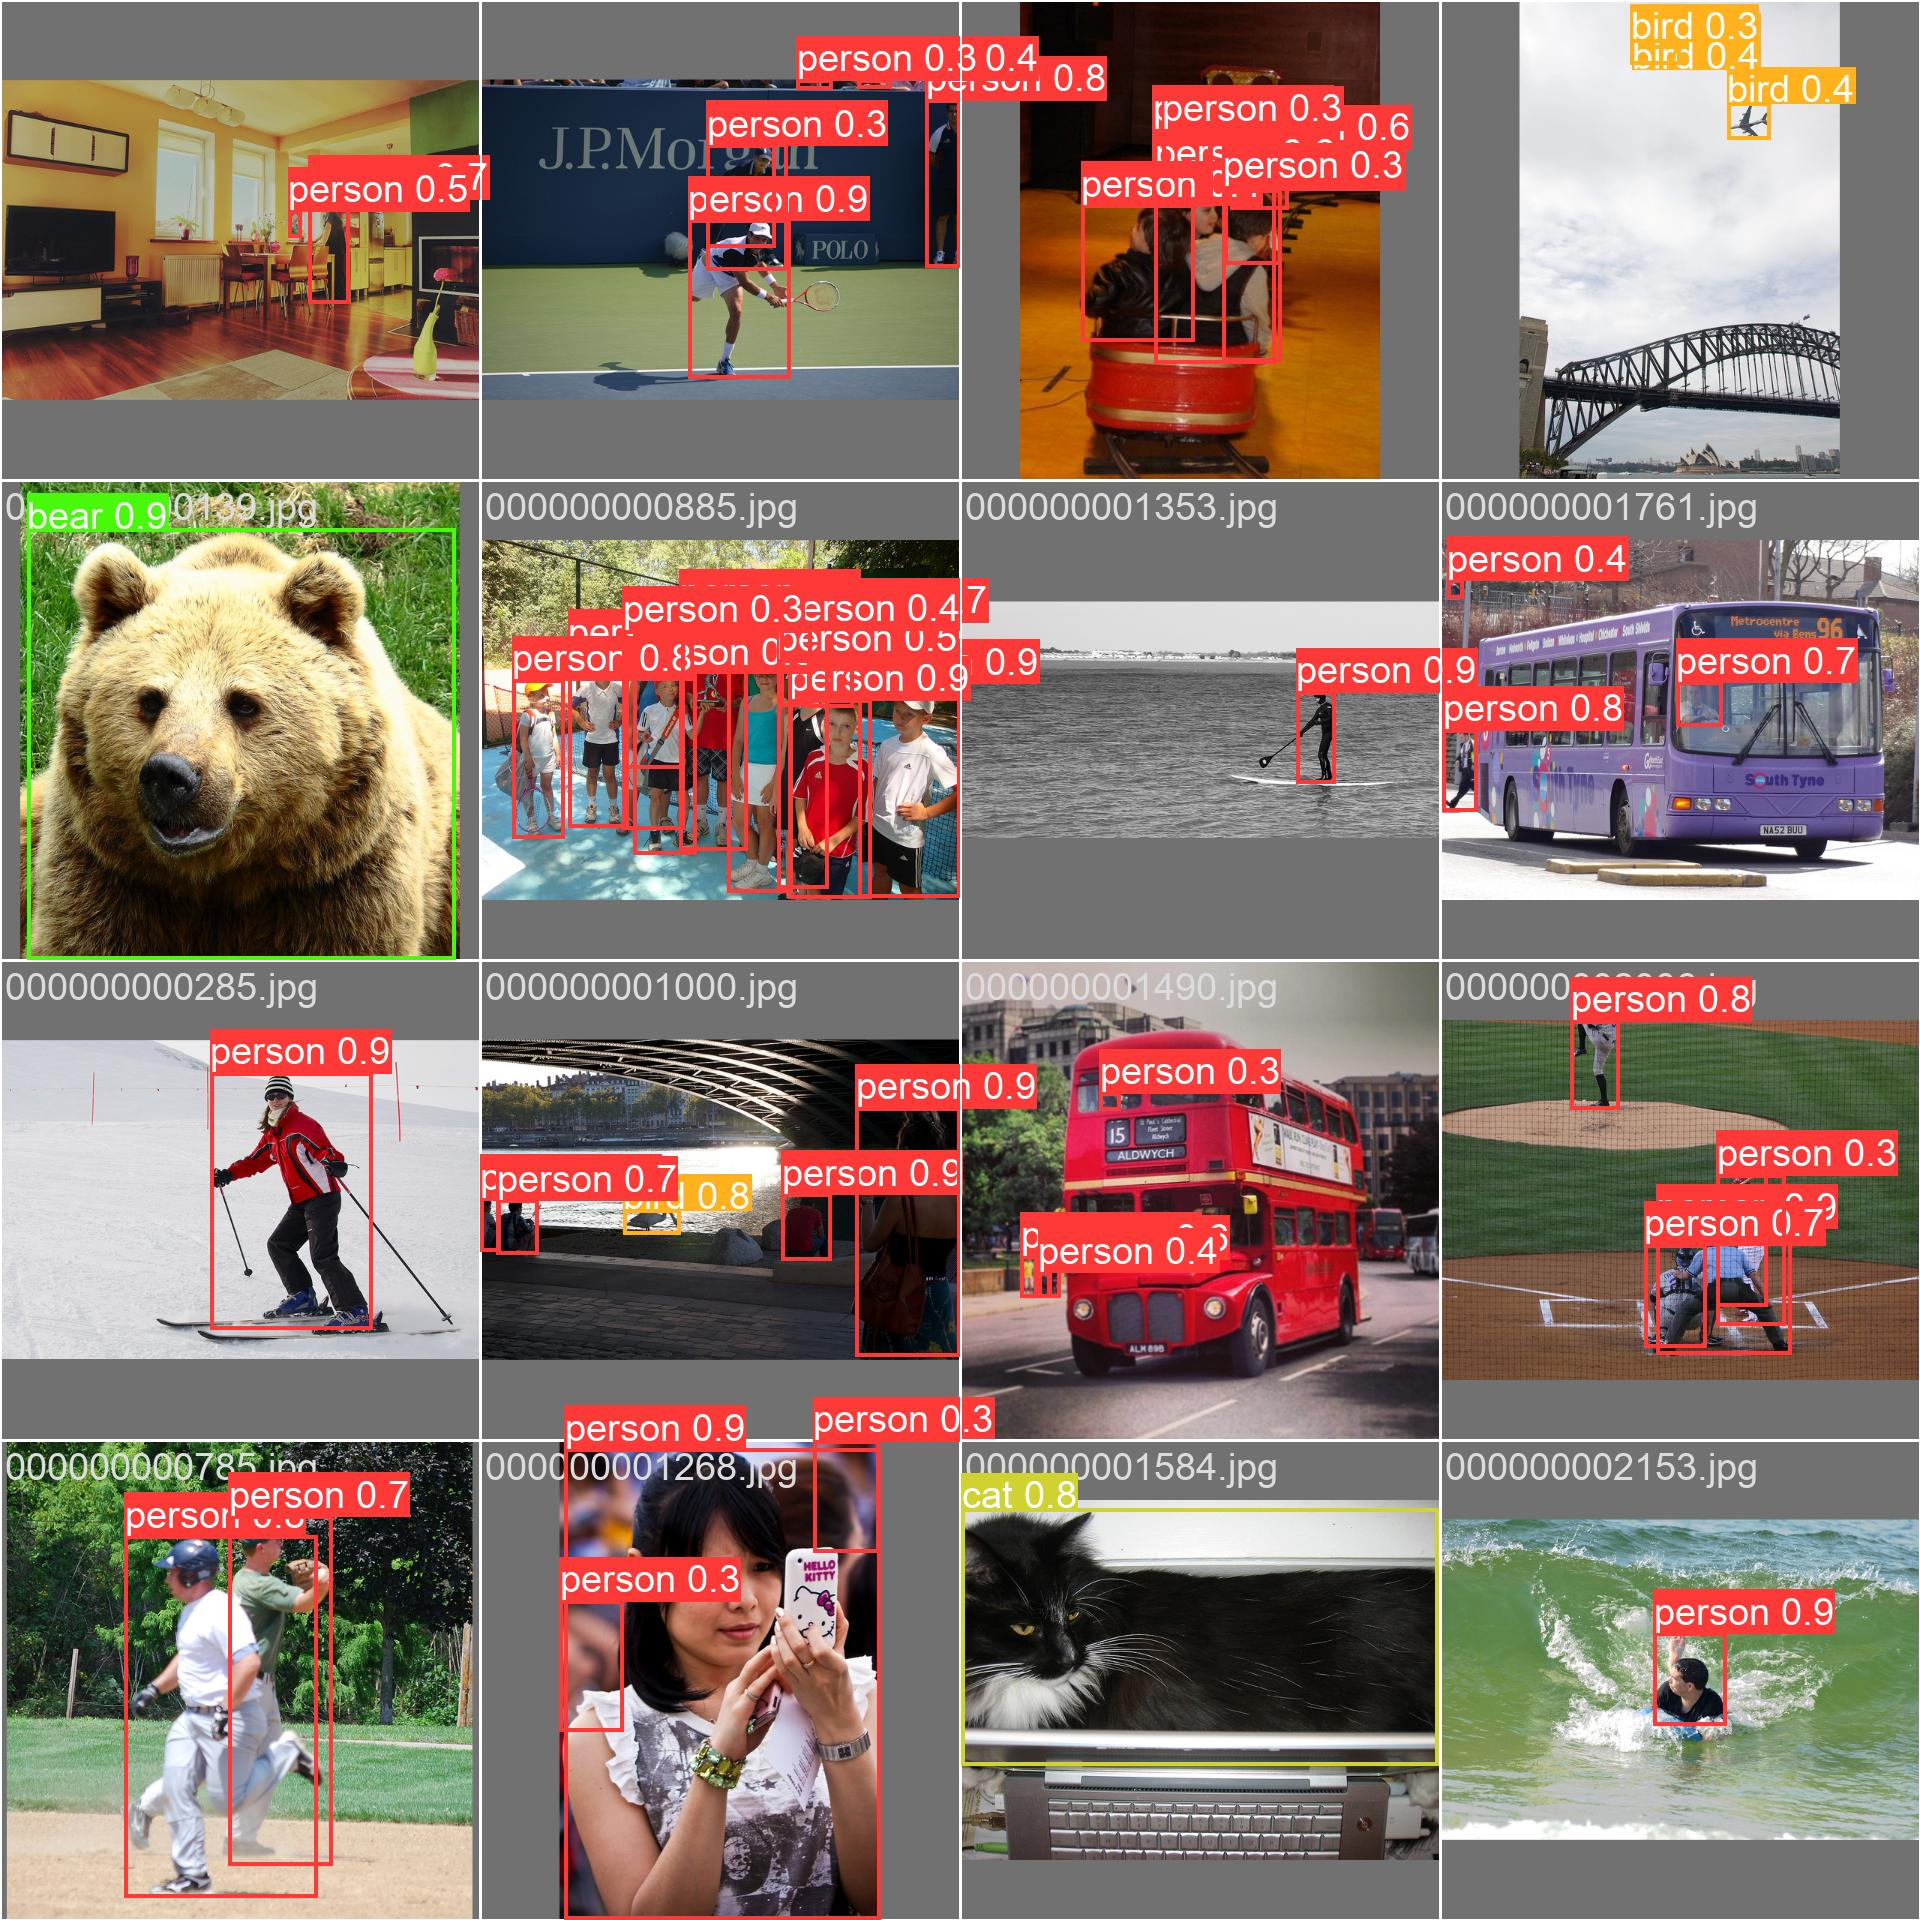

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [10]:
%cd {HOME}
!yolo task=detect mode=val model="{HOME}/runs/detect/train/weights/best.pt" data={dataset_location}/data.yaml

c:\Users\Fomichev Nikita\Desktop\Study\tadimo\coursework


Ultralytics YOLOv8.0.98  Python-3.10.10 torch-2.0.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
Model summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs

val: Scanning C:\Users\Fomichev Nikita\Desktop\Study\tadimo\coursework\dataset\COCO2020_15.yolov8\valid\labels.cache... 8784 images, 50 backgrounds, 0 corrupt: 100%|██████████| 8784/8784 [00:00<?, ?it/s]
val: Scanning C:\Users\Fomichev Nikita\Desktop\Study\tadimo\coursework\dataset\COCO2020_15.yolov8\valid\labels.cache... 8784 images, 50 backgrounds, 0 corrupt: 100%|██████████| 8784/8784 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/549 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 1/549 [00:00<03:13,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 2/549 [00:00<02:34,  3.54it/s]
    

In [11]:
%cd {HOME}
!yolo task=detect mode=predict model="{HOME}/runs/detect/train/weights/best.pt" conf=0.25 source={dataset_location}/test/images save=True

c:\Users\Fomichev Nikita\Desktop\Study\tadimo\coursework


Ultralytics YOLOv8.0.98  Python-3.10.10 torch-2.0.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
Model summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs

image 1/2812 C:\Users\Fomichev Nikita\Desktop\Study\tadimo\coursework\dataset\COCO2020_15.yolov8\test\images\-I1-MS09uaqsLdGTFkgnS0Rcg1mmPyAj95ySg_eckoM_jpeg_jpg.rf.ca3d216ca28be32265e365299a0af4b6.jpg: 640x640 1 person, 2 faces, 8.5ms
image 2/2812 C:\Users\Fomichev Nikita\Desktop\Study\tadimo\coursework\dataset\COCO2020_15.yolov8\test\images\0ad90195-cd77-489e-bf85-08c83b80d3e0_jpg.rf.3317b17670bf4318a3b12a9805730774.jpg: 640x640 4 faces, 5.0ms
image 3/2812 C:\Users\Fomichev Nikita\Desktop\Study\tadimo\coursework\dataset\COCO2020_15.yolov8\test\images\100_jpg.rf.3b64dbd89d8f43217c9009f900533e58.jpg: 640x640 18 apple_greens, 4.0ms
image 4/2812 C:\Users\Fomichev Nikita\Desktop\Study\tadimo\coursework\dataset\COCO2020_15.yolov8\test\images\104_jpg.rf.a6e075d95c758cc64bf221e3c30a53de.jpg: 640x640 24 apple_green

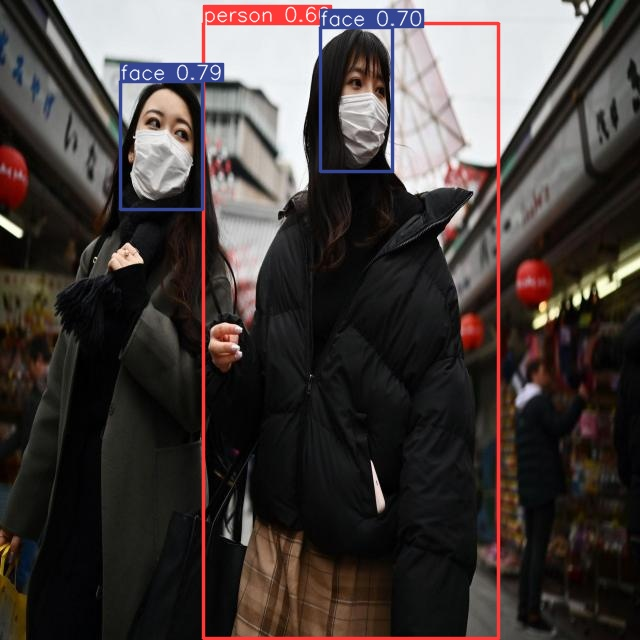

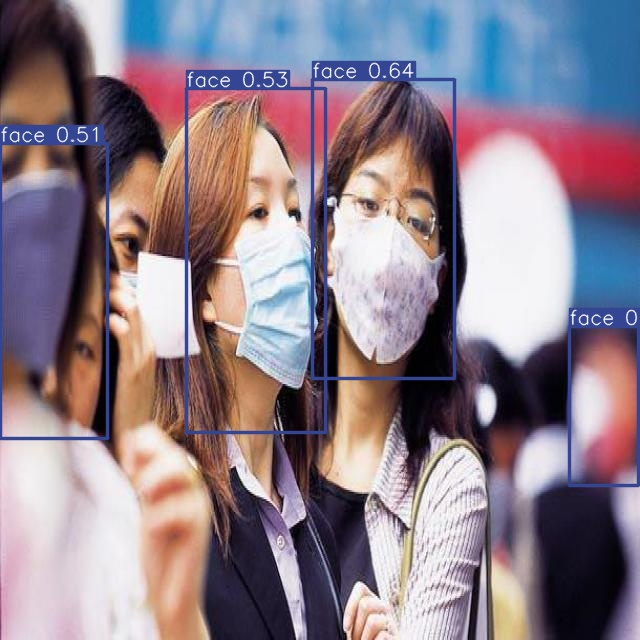

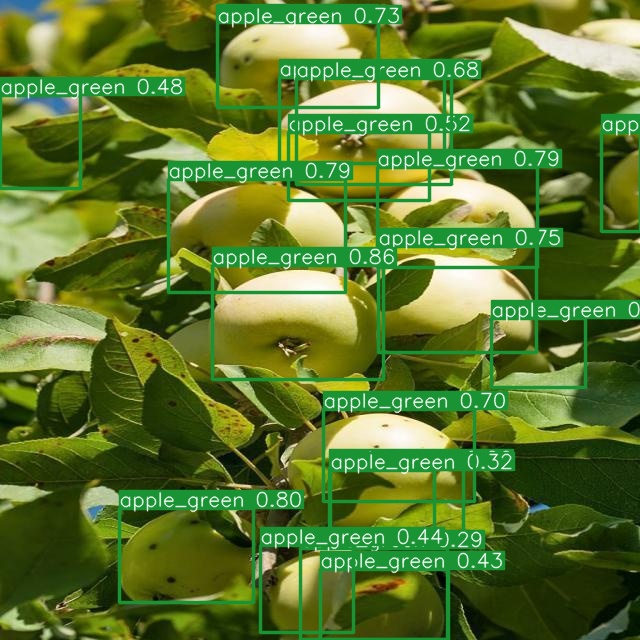

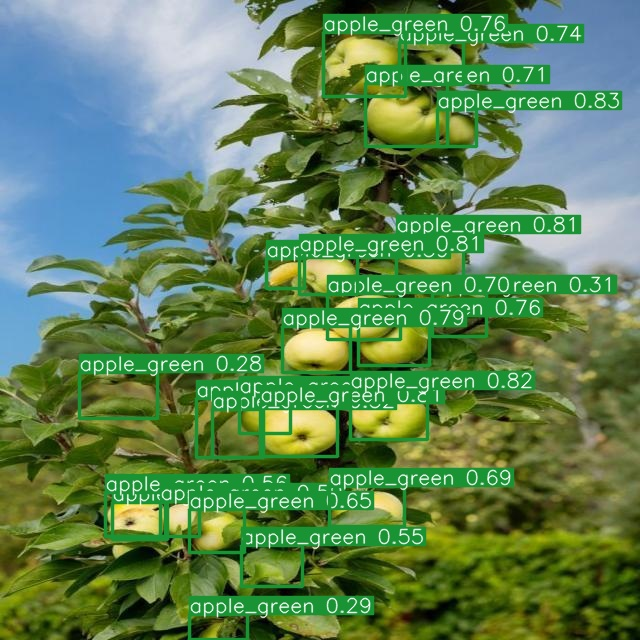

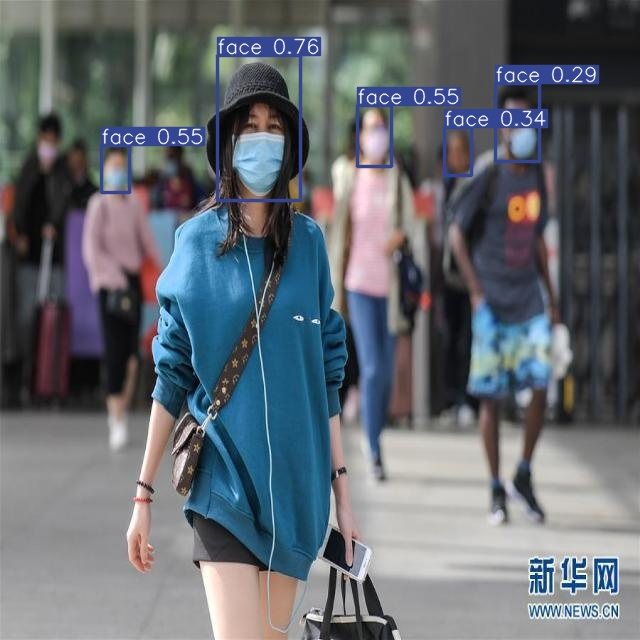

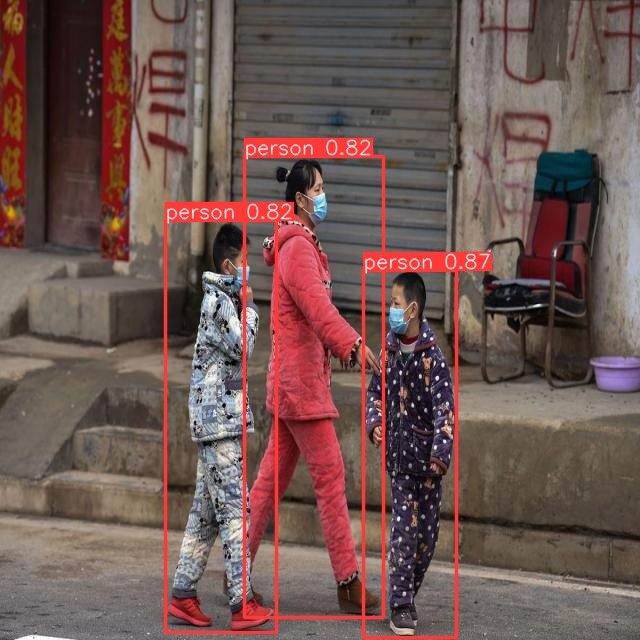

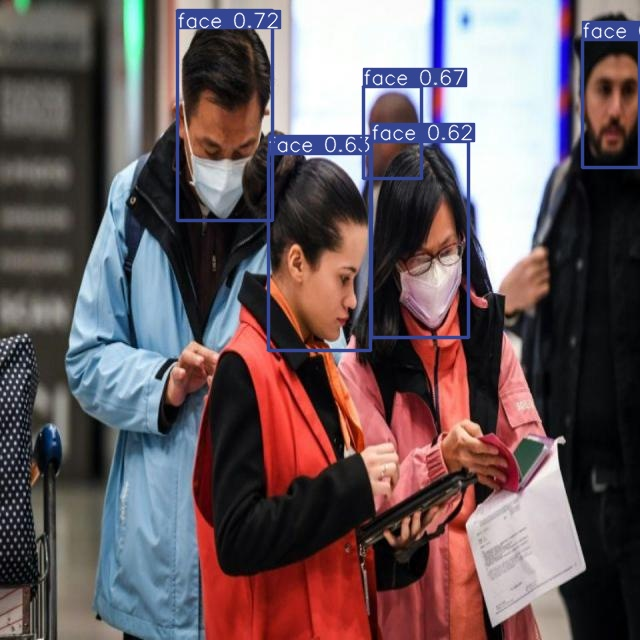

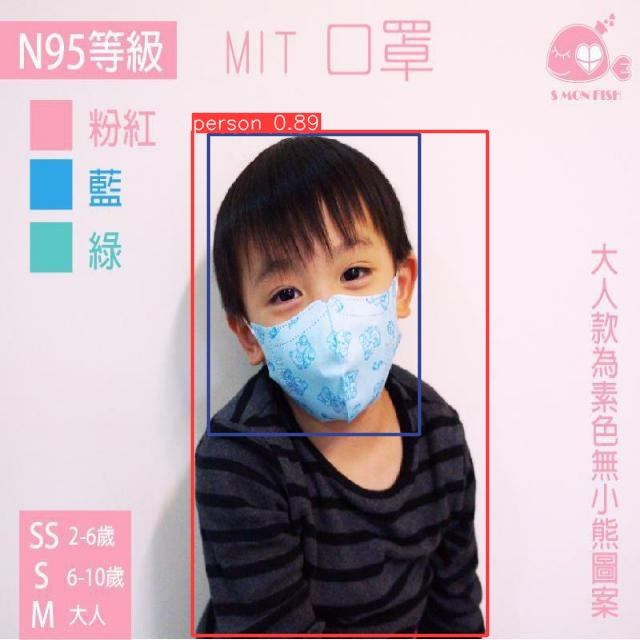

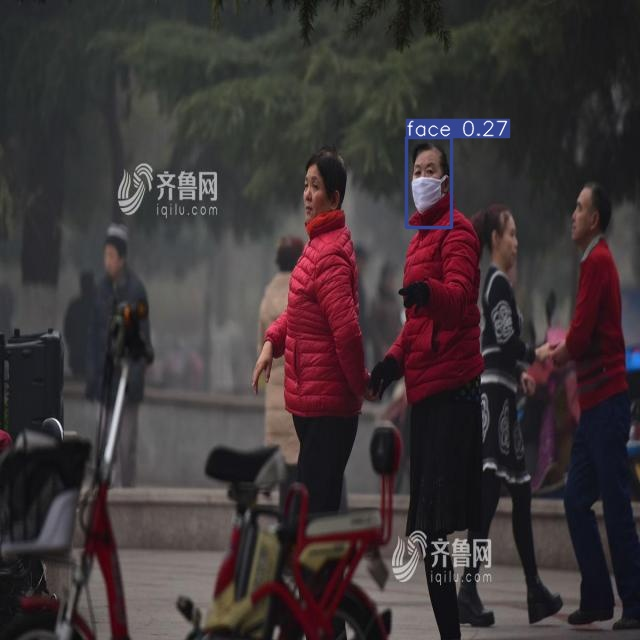

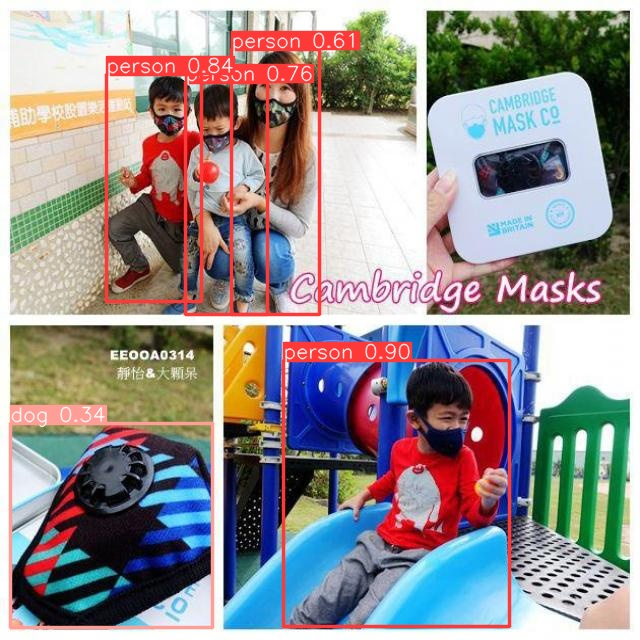

In [12]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [13]:
# project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")